In [3]:
#Importing the Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import datetime

#visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.pyplot as plt, numpy as np

from matplotlib.colors import ListedColormap
from IPython.display import Image
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
import seaborn as sns

In [95]:
#data preprocessing & modelling libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift


# DATA PREPROCESSING

In [5]:
#Loading the dataset
data = pd.read_csv("Downloads/marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [6]:
#size 
print("Number of customers in the dataset: ",len(data))
print("Size of the Dataframe:", data.shape)

Number of customers in the dataset:  2240
Size of the Dataframe: (2240, 29)


In [5]:
#checking null values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
#fill income column with the mean value
data['Income'].fillna(np.round(data['Income'].mean()),inplace=True)

In [8]:
#checking for duplicates
data.duplicated().any()

False

In [9]:
#Displaying datatypes, unique and null values of all columns
data_info = pd.DataFrame(columns=['Name of Column', 'Num of Null', 'Dtype', 'N_Unique'])
for i in range(0, len(data.columns)):
    data_info.loc[i] = [data.columns[i],data[data.columns[i]].isnull().sum(),data[data.columns[i]].dtypes,
                        data[data.columns[i]].nunique()]     
data_info.sort_values(by=['N_Unique'])

Name of Column  Num of Null    Dtype  N_Unique
27            Z_Revenue            0    int64         1
26        Z_CostContact            0    int64         1
28             Response            0    int64         2
20         AcceptedCmp3            0    int64         2
21         AcceptedCmp4            0    int64         2
24         AcceptedCmp2            0    int64         2
25             Complain            0    int64         2
23         AcceptedCmp1            0    int64         2
22         AcceptedCmp5            0    int64         2
5               Kidhome            0    int64         3
6              Teenhome            0    int64         3
2             Education            0   object         5
3        Marital_Status            0   object         8
17  NumCatalogPurchases            0    int64        14
18    NumStorePurchases            0    int64        14
15    NumDealsPurchases            0    int64        15
16      NumWebPurchases            0    int64        15
19    NumWebVisitsMonth            0    int64        16
1            Year_Birth            0    int64        59
8               Recency            0    int64       100
10            MntFruits            0    int64       158
13     MntSweetProducts            0    int64       177
12      MntFishProducts            0    int64       182
14         MntGoldProds            0    int64       213
11      MntMeatProducts            0    int64       558
7           Dt_Customer            0   object       663
9              MntWines            0    int64       776
4                Income            0  float64      1975
0                    ID            0    int64      2240

In [10]:
#convert datatype of Dt_Customer to datetime 
data['Dt_Customer']= pd.to_datetime(data['Dt_Customer'],format='%d-%m-%Y')


In [11]:
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [12]:
#calculating total categories of marital status and education
print("Total categories in the feature Marital_Status:\n",data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n",data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [13]:
#claculating age of customers
data["Age"]=2023-data.Year_Birth

#total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [14]:
#Replacing the conflicting values in marital status
data['Marital_Status'] = data['Marital_Status'].replace(['Alone', 'YOLO', 'Absurd'],'Single')

#total members in the household
data["Family_Size"] = data["Marital_Status"].replace({"Single": 1, "Married":2, "Together":2, "Divorced":1, "Widow":1})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

In [15]:
#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Total spendings
data["Spent"] = data["Wines"]+ data["Fruits"]+ data["Meat"]+ data["Fish"]+ data["Sweets"]+ data["Gold"]

#Total Accepted Campaigns
data['Accepted_Campaigns'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

#Number of Total Purchases
data['Total_Purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']

In [16]:
def family_status(row):
    if row["Is_Parent"] == 1:
        return "Family with Children"
    elif row["Marital_Status"] in ['Married', 'Together'] and row["Is_Parent"] == 0:
        return "Family without Children"
    else:
        return "Single"

data["Family_Status"] = data.apply(lambda row: family_status(row), axis=1)

In [17]:
#number of days customer engaged with company
data['First_day'] = '01-01-2024'
data['First_day'] = pd.to_datetime(data.First_day)
data['Day_engaged'] = (data['First_day'] - data['Dt_Customer']).dt.days

In [18]:
#Dropping some of the repeated features
to_drop = ["Dt_Customer", "Z_CostContact","First_day", "Z_Revenue", "ID"]
data = data.drop(to_drop, axis=1)

In [19]:
data.describe().transpose()

count          mean           std     min       25%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2240.0  52247.248661  25037.797168  1730.0  35538.75   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
Wines                2240.0    303.935714    336.597393     0.0     23.75   
Fruits               2240.0     26.302232     39.773434     0.0      1.00   
Meat                 2240.0    166.950000    225.715373     0.0     16.00   
Fish                 2240.0     37.525446     54.628979     0.0      3.00   
Sweets               2240.0     27.062946     41.280498     0.0      1.00   
Gold                 2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   
Age                  2240.0     54.194196     11.984069    27.0     46.00   
Children             2240.0      0.950446      0.751803     0.0      0.00   
Family_Size          2240.0      2.595089      0.906959     1.0      2.00   
Is_Parent            2240.0      0.715179      0.451430     0.0      0.00   
Spent                2240.0    605.798214    602.249288     5.0     68.75   
Accepted_Campaigns   2240.0      0.297768      0.678381     0.0      0.00   
Total_Purchases      2240.0     14.862054      7.677173     0.0      8.00   
Day_engaged          2240.0   3826.582143    202.122512  3473.0   3653.75   

                         50%       75%       max  
Year_Birth            1970.0   1977.00    1996.0  
Income               51741.5  68289.75  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
Wines                  173.5    504.25    1493.0  
Fruits                   8.0     33.00     199.0  
Meat                    67.0    232.00    1725.0  
Fish                    12.0     50.00     259.0  
Sweets                   8.0     33.00     263.0  
Gold                    24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Response                 0.0      0.00       1.0  
Age                     53.0     64.00     130.0  
Children                 1.0      1.00       3.0  
Family_Size              3.0      3.00       5.0  
Is_Parent                1.0      1.00       1.0  
Spent                  396.0   1045.50    2525.0  
Accepted_Campaigns       0.0      0.00       4.0  
Total_Purchases         15.

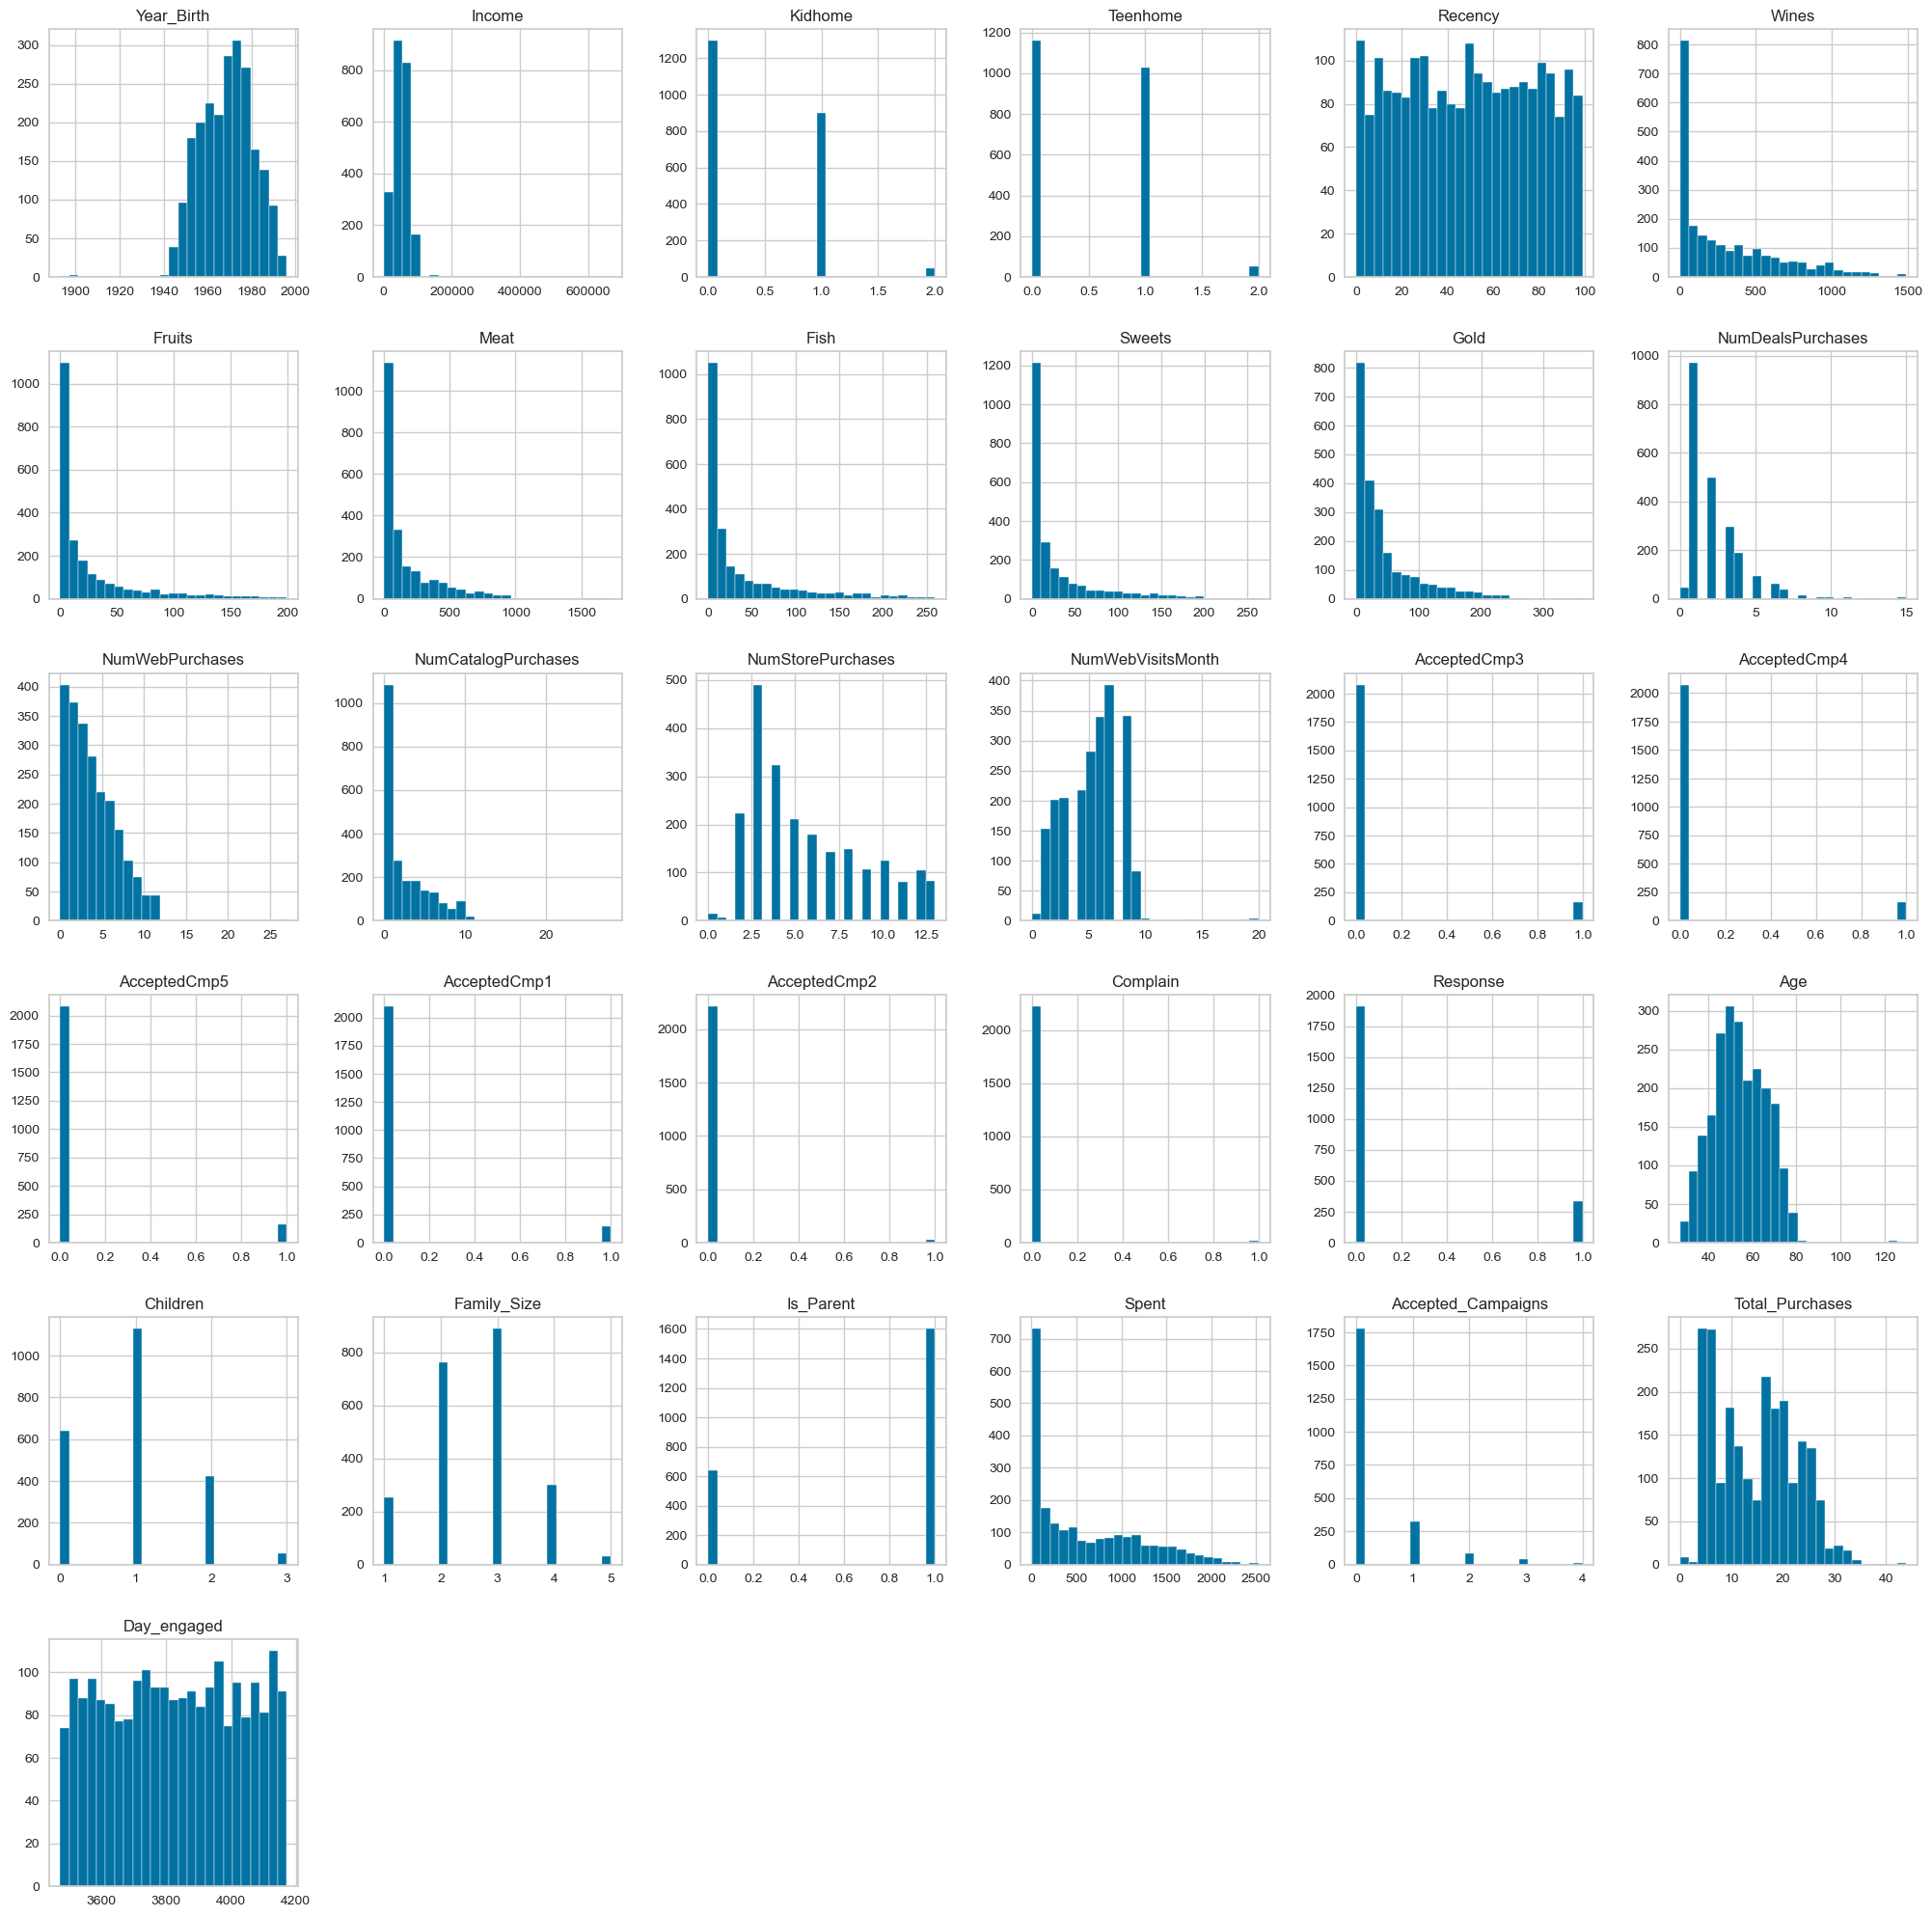

In [20]:
# create histograms of data to check if they have a normal distrubtion
data.hist(bins=25,edgecolor='white', figsize=(25,25))
plt.show()

In [75]:
#Using IQR Method To Identify Columns with potential outliers
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Create an empty list to store columns with potential outliers
columns_with_outliers = []

# Calculate the IQR for each numeric column
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    
    # Check for potential outliers in the column
    outliers = ((data[column] < lower_threshold) | (data[column] > upper_threshold))
    
    # If there are outliers, add the column to the list
    if outliers.any():
        columns_with_outliers.append(column)

# Display columns with potential outliers
print("Columns with potential outliers:")
print(columns_with_outliers)


Columns with potential outliers:
['Year_Birth', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Children', 'Family_Size', 'Spent', 'Accepted_Campaigns', 'Total_Purchases']


Text(0.5, 1.0, 'Distribution of Birth Year')

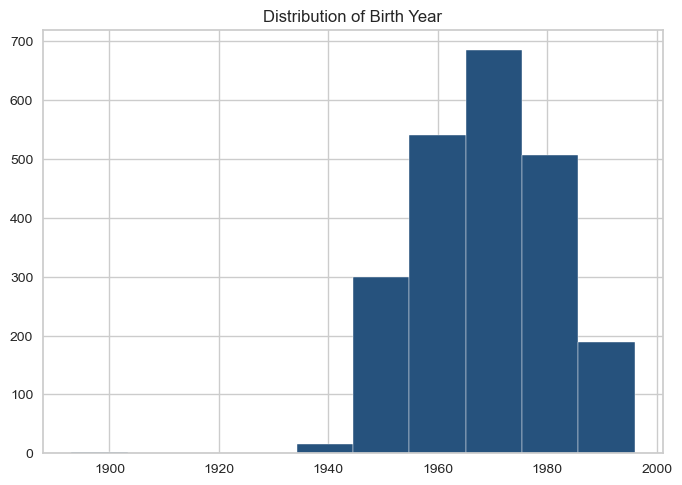

In [21]:
plt.hist(x=data['Year_Birth'],edgecolor='white',bins=10,color='#26527D')
plt.title('Distribution of Birth Year')

Text(0.5, 1.0, 'Distribution of Age')

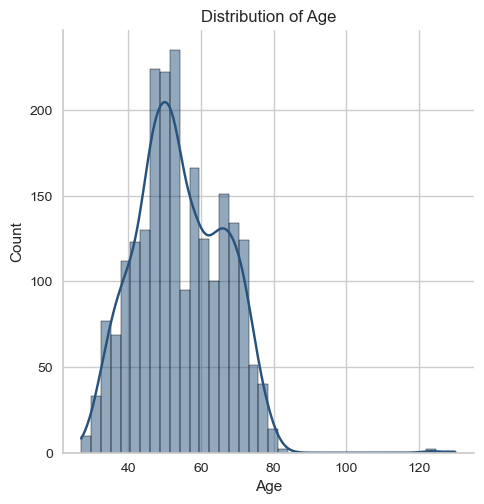

In [21]:
sns.displot(data=data,x='Age',kde=True,color='#26527D')
plt.title('Distribution of Age')


In [22]:
print("The Age looks \033[1mnormally distributed\033[0m and ranges between:\033[1m" ,data['Age'].min(), "-" ,
      data['Age'].max() ,"years ")

The Age looks normally distributed and ranges between: 27 - 130 years 


In [23]:
#Finding Upper and lower limit to deal with outliers 
upper_limit = data['Age'].quantile(0.99)
upper_limit

78.0

In [24]:
lower_limit = data['Age'].quantile(0.01)
lower_limit

31.0

In [25]:
#Capping on Age
data['Age'] = np.where(data['Age'] >= upper_limit,
                       upper_limit,
                       np.where(data['Age'] <= lower_limit,
                                lower_limit,
                                data['Age']))

Text(0.5, 1.0, 'Distribution of Age')

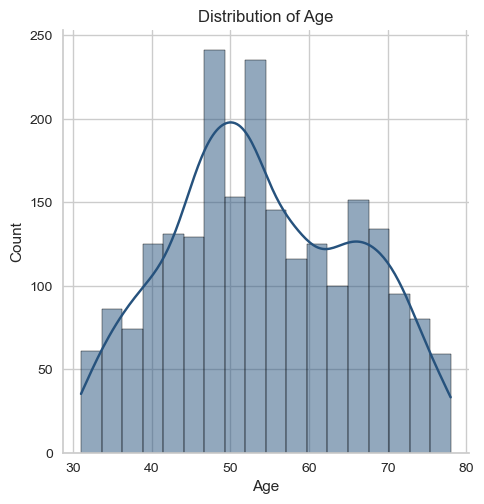

In [26]:
sns.displot(data=data,x='Age',kde=True,color='#26527D')
plt.title('Distribution of Age')

<AxesSubplot:xlabel='Income'>

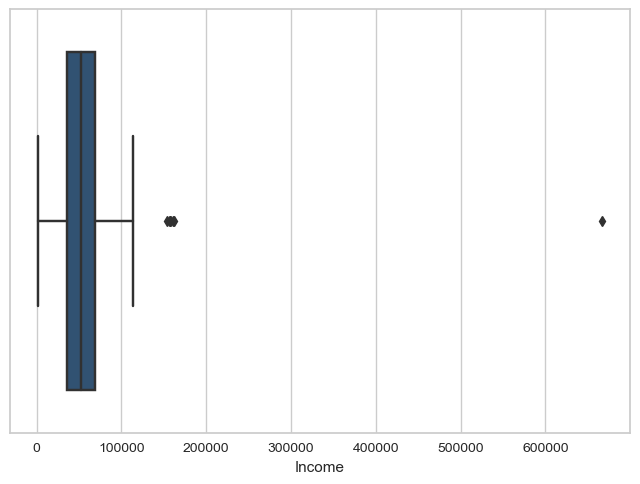

In [28]:
#visualizing income column
sns.boxplot(x='Income',data=data,color='#26527D')

In [29]:
upper_limit = data['Income'].quantile(0.99)
upper_limit

94437.68000000001

In [30]:
lower_limit = data['Income'].quantile(0.01)
lower_limit

7705.92

In [31]:
#Capping on Income
data['Income'] = np.where(data['Income'] >= upper_limit,
                       upper_limit,
                       np.where(data['Income'] <= lower_limit,
                                lower_limit,
                                data['Income']))

<AxesSubplot:xlabel='Income'>

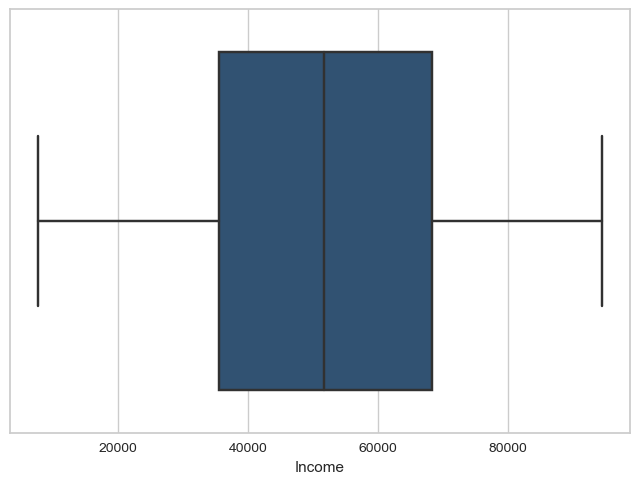

In [32]:
sns.boxplot(x='Income',data=data,color='#26527D')

<AxesSubplot:xlabel='Total_Purchases'>

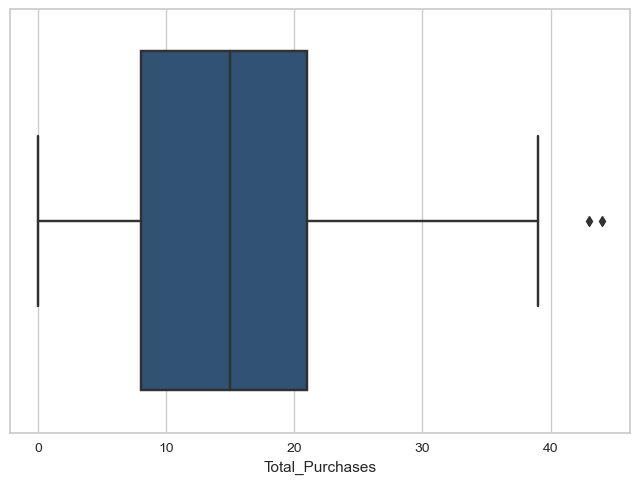

In [76]:
#visualizing Total_Purchases column
sns.boxplot(x='Total_Purchases',data=data,color='#26527D')

In [77]:
upper_limit = data['Total_Purchases'].quantile(0.99)
upper_limit

32.0

In [78]:
lower_limit = data['Total_Purchases'].quantile(0.01)
lower_limit

4.0

In [79]:
#Capping on Total_Purchases
data['Total_Purchases'] = np.where(data['Total_Purchases'] >= upper_limit,upper_limit,np.where(data['Total_Purchases'] <= lower_limit,lower_limit,data['Total_Purchases']))

<AxesSubplot:xlabel='Total_Purchases'>

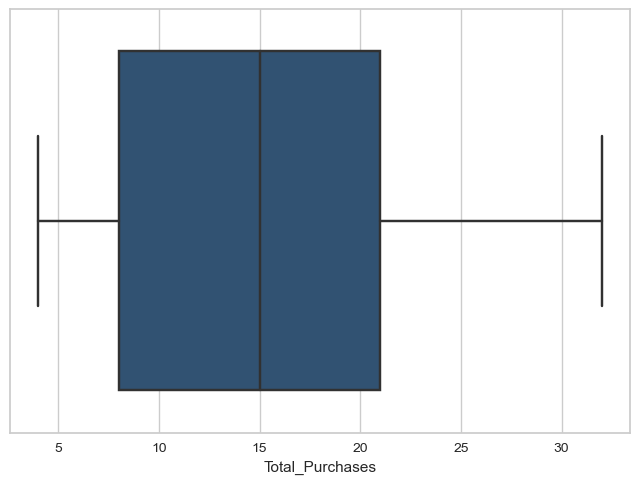

In [80]:
sns.boxplot(x='Total_Purchases',data=data,color='#26527D')

# DATA VISUALIZATION

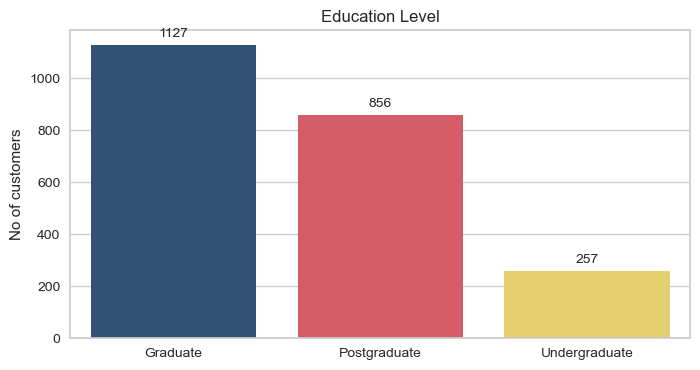

In [33]:
#Education level of customers
color=['#26527D','#E84855','#F9DC5C','#3185FC','#61988E']
plt.figure(figsize=(8,4))
plots=sns.countplot(x='Education',data=data,palette=color)
plt.ylabel('No of customers')
plt.title('Education Level')
plt.xlabel('')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0,8),
                       textcoords='offset points')

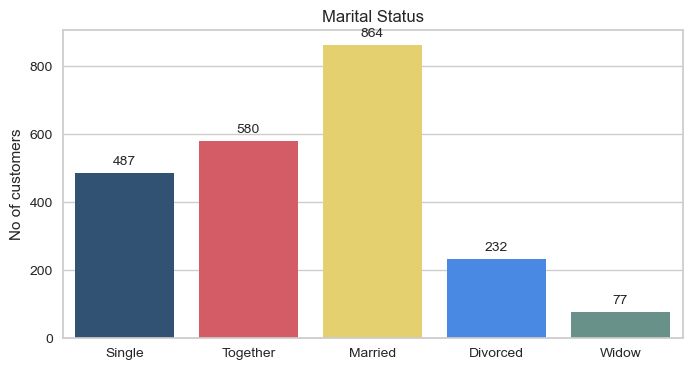

In [34]:
#Marital Staus of Customers
color=['#26527D','#E84855','#F9DC5C','#3185FC','#61988E']
plt.figure(figsize=(8,4))
plots=sns.countplot(x='Marital_Status',data=data,palette=color)
plt.ylabel('No of customers')
plt.title('Marital Status')
plt.xlabel('')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0,8),
                       textcoords='offset points')

Text(0.5, 1.0, 'Are they parents?')

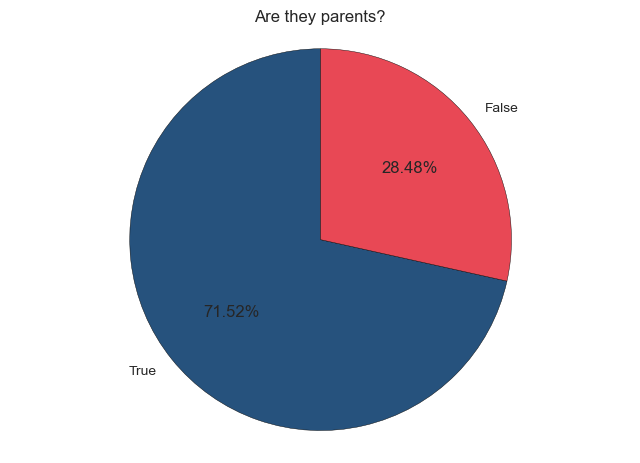

In [35]:
#Parental Status
fig , ax = plt.subplots()
sizes = data['Is_Parent'].value_counts()
labels = 'True', 'False' 
ax.pie(sizes,labels=labels,autopct='%1.2f%%', startangle=90,wedgeprops={'edgecolor':'black'},
        colors=['#26527D','#E84855'])
ax.axis('equal')
ax.set_title('Are they parents?')

In [37]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets',
       'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Children', 'Family_Size', 'Is_Parent',
       'Spent', 'Accepted_Campaigns', 'Total_Purchases', 'Family_Status',
       'Day_engaged'],
      dtype='object')

Text(0.5, 1.0, 'Complaints raised by the customer')

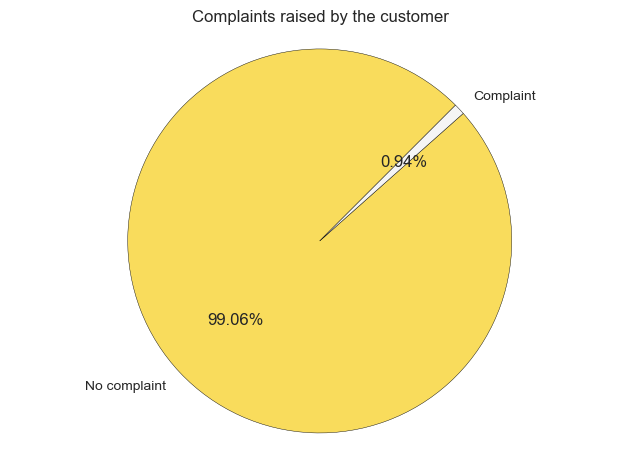

In [38]:
fig , ax = plt.subplots()
sizes = data['Complain'].value_counts() 
labels = 'No complaint', 'Complaint' 
ax.pie(sizes,labels=labels,autopct='%1.2f%%', startangle=45,wedgeprops={'edgecolor':'black'},
        colors=['#F9DC5C','#F5F5F5'])
ax.axis('equal')
ax.set_title('Complaints raised by the customer')

<AxesSubplot:title={'center':'Correlation between values'}>

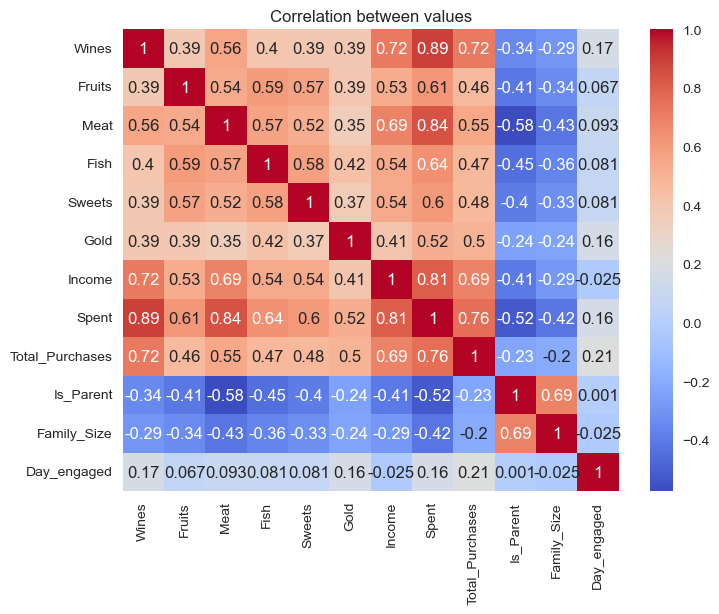

In [81]:
#Pearson Correlation Between Some Selected Features
corr_data= data[["Wines","Fruits","Meat","Fish","Sweets","Gold","Income","Spent","Total_Purchases","Is_Parent","Family_Size","Day_engaged",]]
fig = plt.figure(figsize=(8,6))
plt.title('Correlation between values')
sns.heatmap(corr_data.corr(), annot=True, cmap="coolwarm")

In [41]:
print("Observations :\nIncome is positively correlated with wine and meat consumption, and also total spent of a customer.\nTotal spent is negatively correlated with parenthood and family size.\nThere is no significant relationship between number of days that customers started to shop in the store and among other features.")

Observations :
Income is positively correlated with wine and meat consumption, and also total spent of a customer.
Total spent is negatively correlated with parenthood and family size.
There is no significant relationship between number of days that customers started to shop in the store and among other features.


In [42]:
#Visualization of Demographic Features
fig = make_subplots(rows=2, cols=2, start_cell="bottom-left", subplot_titles=("Age", "Income", "Family Size", "Children"))
fig.add_trace(go.Box(x=data.Age, name="Age",boxmean=True),row=1,col=1)
fig.add_trace(go.Box(x=data.Income,name="Income",boxmean=True),row=1, col=2)
fig.add_trace(go.Box(x=data.Family_Size,name="Family Size",boxmean=True),row=2, col=1)
fig.add_trace(go.Box(x=data.Children,name="Children",boxmean=True),row=2, col=2)
fig.show()

In [43]:
print("Observations:\nThe average household size is 3. \nCustomers with families generally have one child.\nThe average age of customers is 54. \nCustomers are mostly adults over 31.\nThe average income value is 52,000, and the median of the income distribution is 51,000.")

Observations:
The average household size is 3. 
Customers with families generally have one child.
The average age of customers is 54. 
Customers are mostly adults over 31.
The average income value is 52,000, and the median of the income distribution is 51,000.


In [82]:
#Analyzing total purchases and expenditure by family staus and education
fig1 = px.box(data, x="Family_Status", y="Spent", color="Education",
             notched=False, # used notched shape
             title="Total Spent by Family Status & Education" 
            )
fig2 = px.box(data, x="Family_Status", y="Total_Purchases", color="Education",
             notched=False, # used notched shape
             title="Total Purchases by Family Status & Education" 
             )
fig1.show()
fig2.show()

In [83]:
#Helper function
def transform(x):
    if x == 'Together' or x=='Married':
        return 'Relationship'
    else:
        return 'Alone'
data['status'] = data['Marital_Status'].apply(transform)

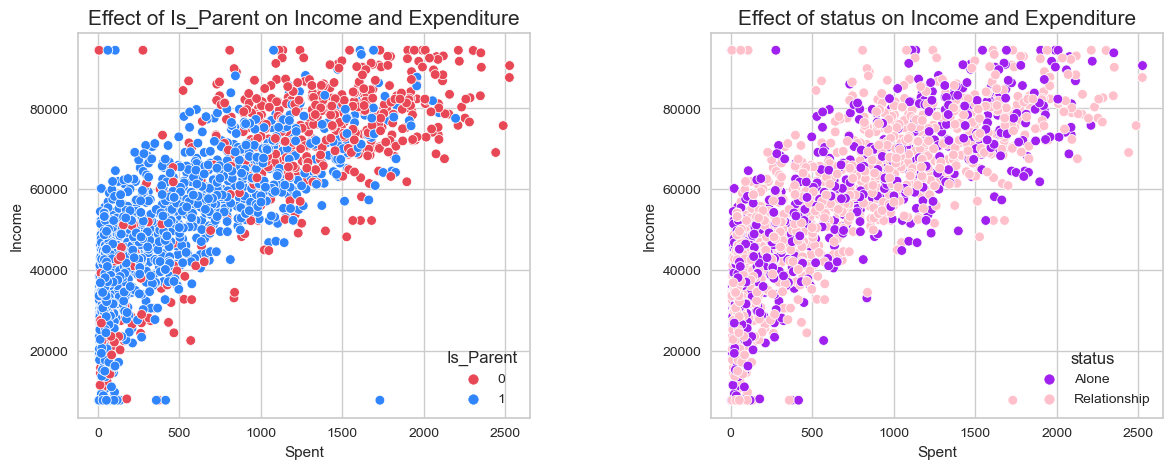

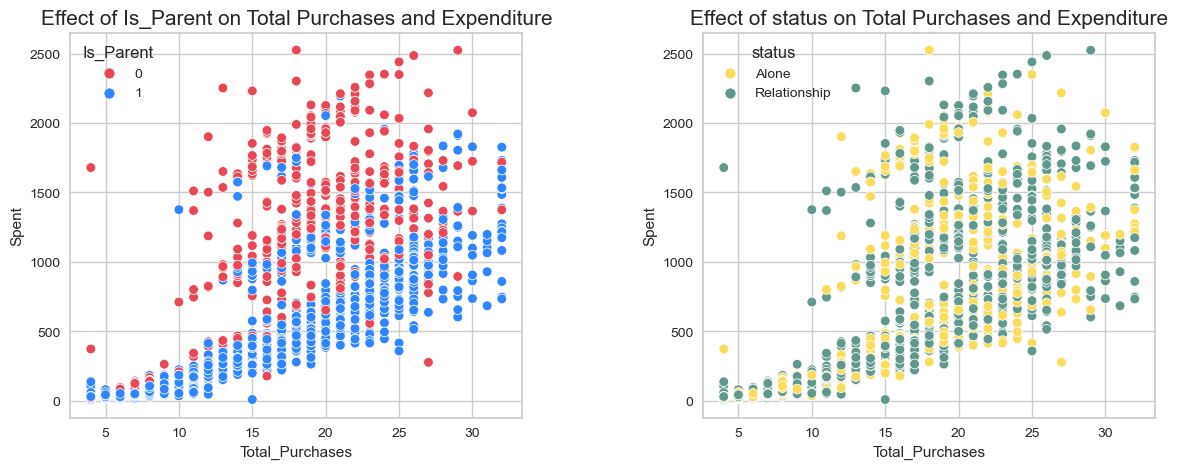

In [84]:
#analyzing Income, Expenditure and Purchases based on features we created earlier
to_plot = ['Is_Parent', 'status']
color = [['#E84855', '#3185FC'], ['#A020F0', '#FFC0CB']]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
axes = axes.flatten()
for i, col in enumerate(to_plot):
    ax = sns.scatterplot(data=data, x='Spent', y='Income', ax=axes[i], hue=col, palette=color[i])
    ax.set_title(f'Effect of {col} on Income and Expenditure', fontsize=15)

plt.subplots_adjust(wspace=0.4)
plt.show()
to_plot = ['Is_Parent', 'status']
color = [['#E84855', '#3185FC'], ['#F9DC5C', '#61988E']]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
axes = axes.flatten()
for i, col in enumerate(to_plot):
    ax = sns.scatterplot(data=data, x='Total_Purchases', y='Spent', ax=axes[i], hue=col, palette=color[i])
    ax.set_title(f'Effect of {col} on Total Purchases and Expenditure', fontsize=15)
plt.subplots_adjust(wspace=0.4)
plt.show()

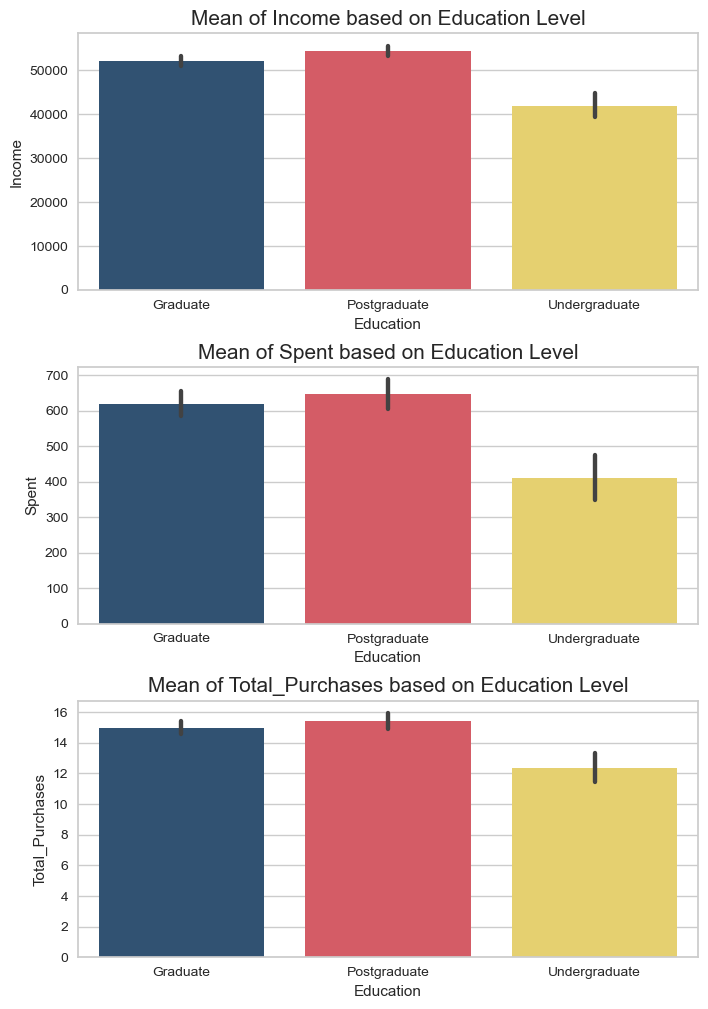

In [48]:
#Analyzing the affect of education level on various factors
color=['#26527D','#E84855','#F9DC5C','#3185FC','#61988E']
to_plot=['Income','Spent','Total_Purchases']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (8, 12))
axes = axes.flatten()
for col, ax in zip(to_plot, axes):
    ax = sns.barplot(data = data, x = 'Education', y = col, ax = ax,palette=color)
    ax.set_title(f'Mean of {col} based on Education Level', fontsize = 15)
    plt.subplots_adjust(hspace = 0.3)
plt.show()

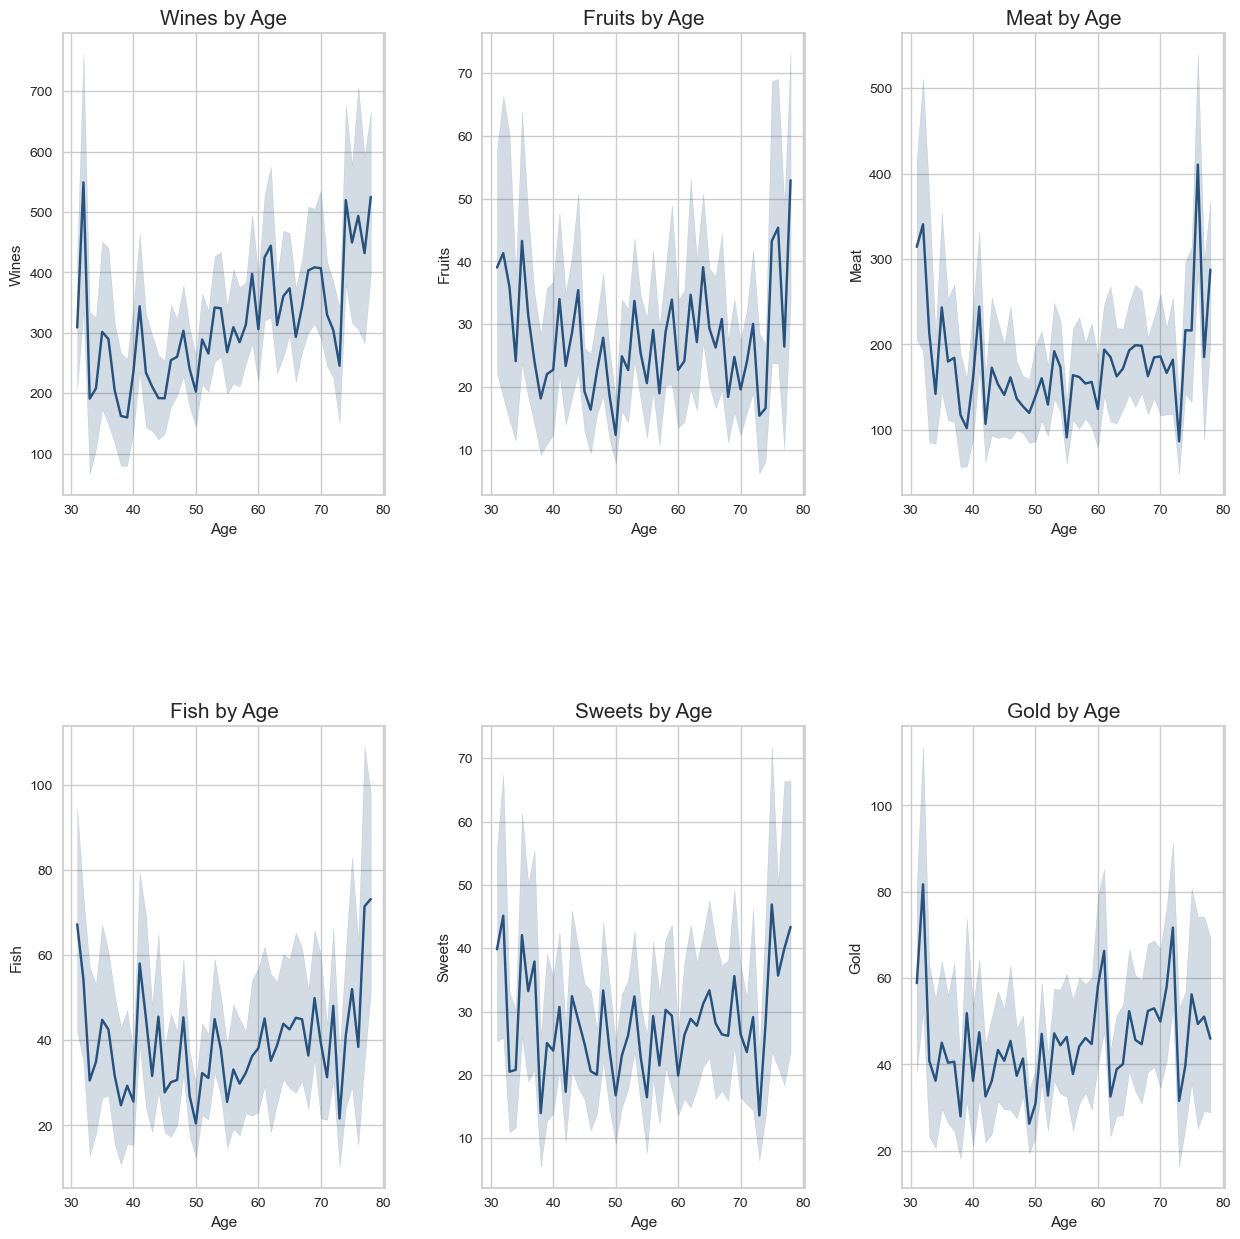

In [49]:
#looking at the amount spent on Individual products by Age
to_plot = ['Wines','Fruits','Meat','Fish','Sweets','Gold']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (15, 15))
axes = axes.flatten()
for col, ax in zip(to_plot, axes):
    ax = sns.lineplot(data = data, x = 'Age', y = col, ax = ax,color='#26527D')
    ax.set_title(f'{col} by Age', fontsize = 15)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)    
plt.show()

In [85]:
#looking at the amount spent on Individual products by family status
#Single customers
data_single = data[data.Family_Status == "Single"]
trace_single_1 = go.Box(
    x=data_single.Wines,
    name = "Wines",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace_single_2 = go.Box(
    x=data_single.Fruits,
    name = "Fruits",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))
trace_single_3 = go.Box(
    x=data_single.Meat,
    name = "Meat",
    marker=dict(color='rgba(0, 255, 200, 0.8)'))
trace_single_4 = go.Box(
    x=data_single.Fish,
    name = "Fish",
    marker=dict(color='rgb(12, 128, 128)'))
trace_single_5 = go.Box(
    x=data_single.Sweets,
    name = "Sweets",
    marker=dict(color='rgba(255, 255, 128, 0.5)'))
trace_single_6 = go.Box(
    x=data_single.Gold,
    name = "Gold",
    marker=dict(color='rgba(255, 128, 2, 0.8)'))
data_single_ = [trace_single_1, trace_single_2, trace_single_3,trace_single_4,trace_single_5,trace_single_6]
layout = go.Layout(barmode='overlay',
                   title=' Amount Spent on Different Products for Singles',
                   xaxis=dict(title='Amount Spend'),
                   yaxis=dict( title='Product'),
)
fig1 = go.Figure(data=data_single_, layout=layout)

#Customers in a relationship
data_relationship = data[data.Family_Status == "Family without Children"]
trace_relationship_1 = go.Box(
    x=data_relationship.Wines,
    name = "Wines",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace_relationship_2 = go.Box(
    x=data_relationship.Fruits,
    name = "Fruits",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))
trace_relationship_3 = go.Box(
    x=data_relationship.Meat,
    name = "Meat",
    marker=dict(color='rgba(0, 255, 200, 0.8)'))
trace_relationship_4 = go.Box(
    x=data_relationship.Fish,
    name = "Fish",
    marker=dict(color='rgb(12, 128, 128)'))
trace_relationship_5 = go.Box(
    x=data_relationship.Sweets,
    name = "Sweets",
    marker=dict(color='rgba(255, 255, 128, 0.5)'))
trace_relationship_6 = go.Box(
    x=data_relationship.Gold,
    name = "Gold",
    marker=dict(color='rgba(255, 128, 2, 0.8)'))
data_relationship_ = [trace_relationship_1, trace_relationship_2, trace_relationship_3,trace_relationship_4,trace_relationship_5,trace_relationship_6]
layout2 = go.Layout(barmode='overlay',
                   title=' Amount Spent on Different Products for Customers in a Relationship',
                   xaxis=dict(title='Amount Spend'),
                   yaxis=dict( title='Product'),
)
fig2 = go.Figure(data=data_relationship_, layout=layout2)

#Customers in a relationship
data_families = data[data.Family_Status == "Family with Children"]
trace_families_1 = go.Box(
    x=data_families.Wines,
    name = "Wines",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace_families_2 = go.Box(
    x=data_families.Fruits,
    name = "Fruits",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))
trace_families_3 = go.Box(
    x=data_families.Meat,
    name = "Meat",
    marker=dict(color='rgba(0, 255, 200, 0.8)'))
trace_families_4 = go.Box(
    x=data_families.Fish,
    name = "Fish",
    marker=dict(color='rgb(12, 128, 128)'))
trace_families_5 = go.Box(
    x=data_families.Sweets,
    name = "Sweets",
    marker=dict(color='rgba(255, 255, 128, 0.5)'))
trace_families_6 = go.Box(
    x=data_families.Gold,
    name = "Gold",
    marker=dict(color='rgba(255, 128, 2, 0.8)'))

data_families_ = [trace_families_1, trace_families_2, trace_families_3,trace_families_4,trace_families_5,trace_families_6]
layout3 = go.Layout(barmode='overlay',
                   title=' Amount Spent on Different Products for Customers with children',
                   xaxis=dict(title='Amount Spend'),
                   yaxis=dict( title='Product'),)
fig3 = go.Figure(data=data_families_, layout=layout3)
fig1.show()
fig2.show()
fig3.show()

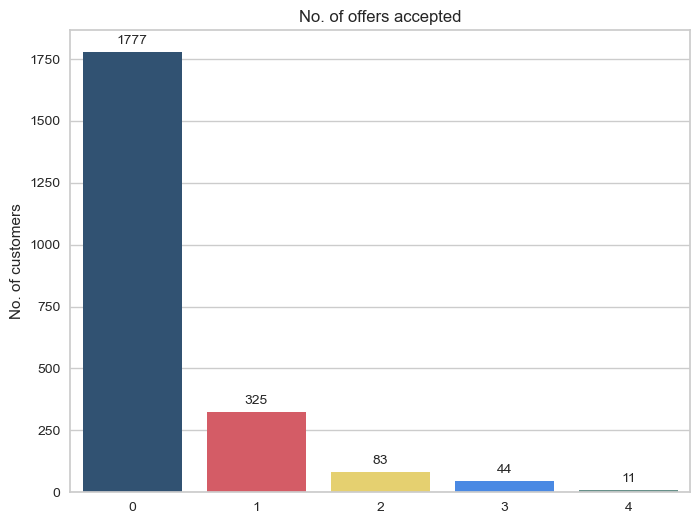

In [51]:
#offers accepted by customers
color=['#26527D','#E84855','#F9DC5C','#3185FC','#61988E']
plt.figure(figsize=(8,6))
plots=sns.countplot(x='Accepted_Campaigns',data=data,palette=color)
plt.ylabel('No. of customers')
plt.title('No. of offers accepted')
plt.xlabel('')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0,8),
                       textcoords='offset points')

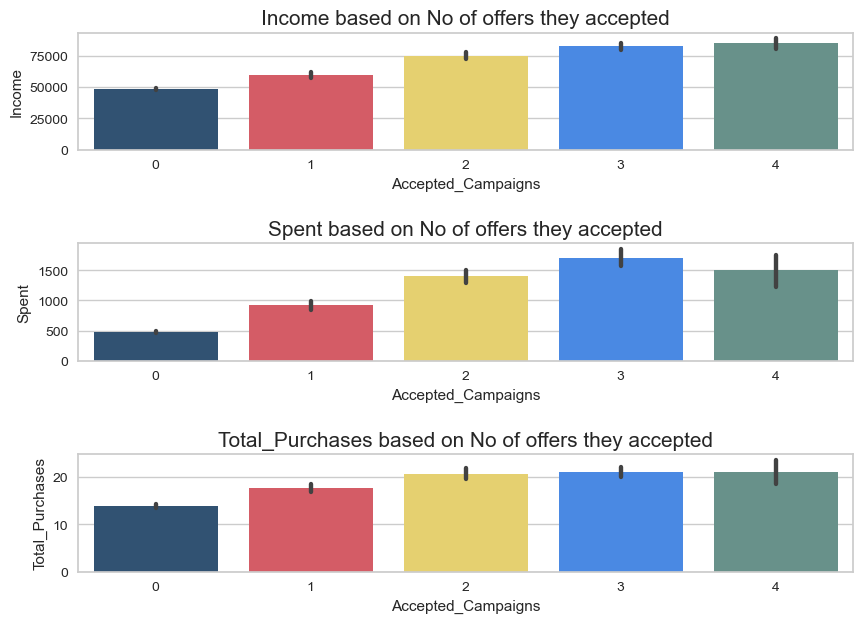

In [52]:
#Offers accepted w.r.t Income, Expenditure, and Purchases
color=['#26527D','#E84855','#F9DC5C','#3185FC','#61988E']
to_plot=['Income','Spent','Total_Purchases']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (10, 7))
axes = axes.flatten()
for col, ax in zip(to_plot, axes):
    ax = sns.barplot(data = data, x = 'Accepted_Campaigns', y = col, ax = ax,palette=color)
    ax.set_title(f'{col} based on No of offers they accepted', fontsize = 15)
    plt.subplots_adjust(hspace = 0.8)    
plt.show()

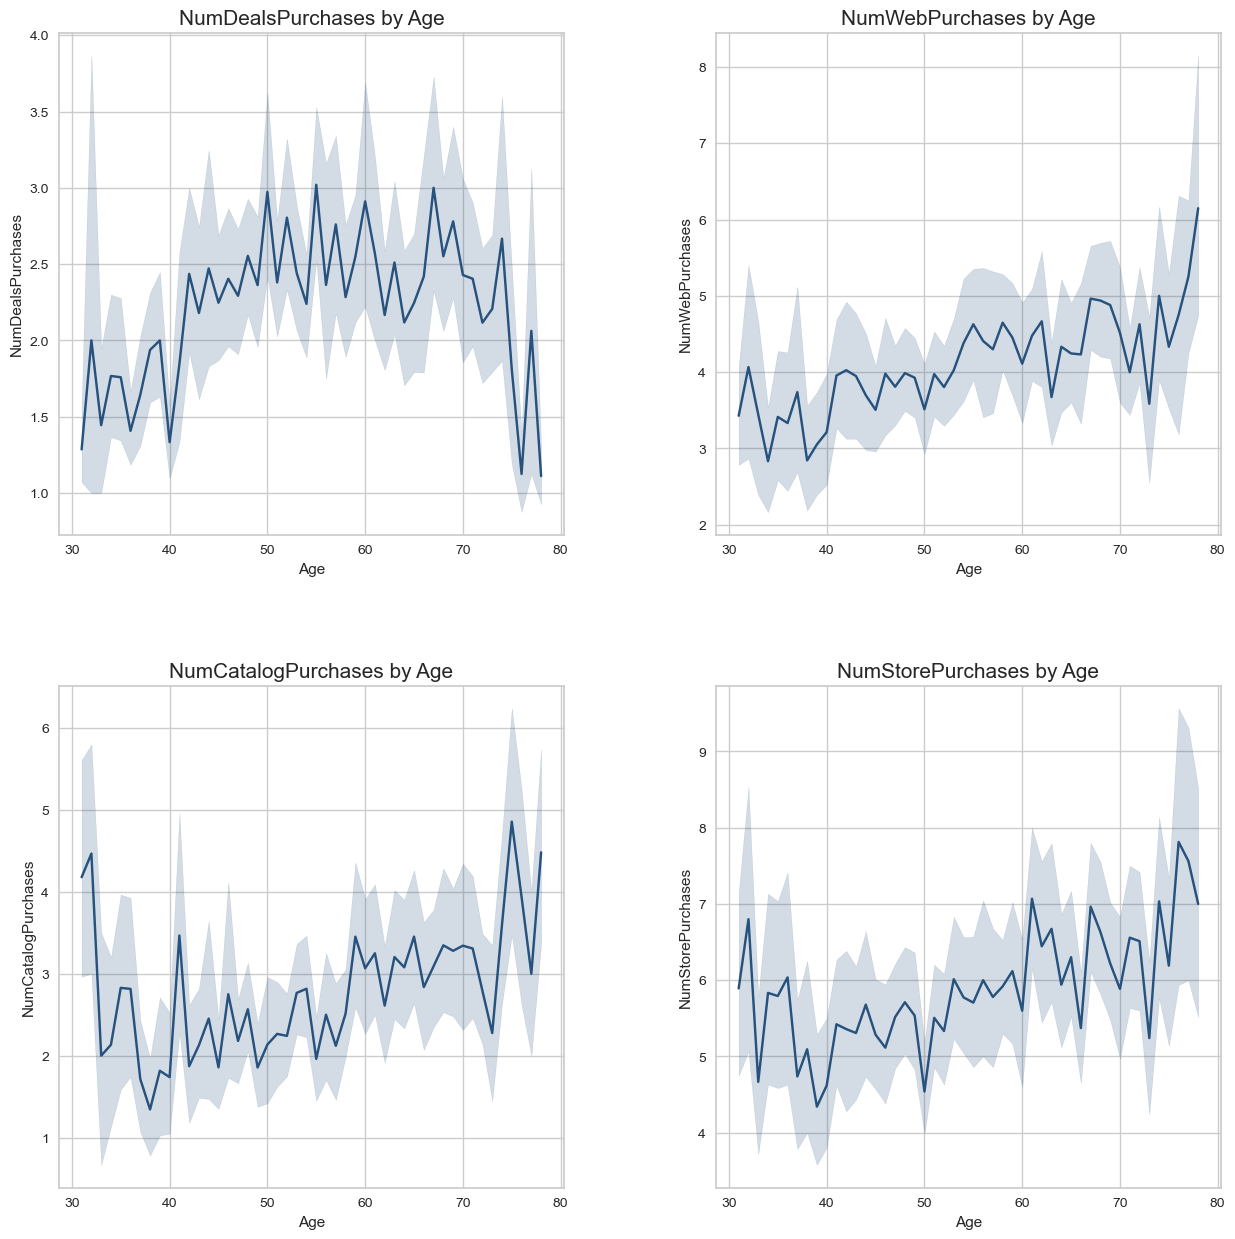

In [50]:
#Total purchases by Age
to_plot = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (15, 15))
axes = axes.flatten()
for col, ax in zip(to_plot, axes):
    ax = sns.lineplot(data = data, x = 'Age', y = col, ax = ax,color='#26527D')
    ax.set_title(f'{col} by Age', fontsize = 15)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)    
plt.show()

In [51]:
#Next step is to reduce the dimensionality using PCA but before that we can drop some more columns that do not provide insights such as:
#Year_Birth : We will use Age instead
#Dt_Customer and month : We will use year only to track when the customer joined
#Complain : Less than 1% only filed complian and hence not useful for clustering
#Marital Status and status : As observed earlier marital status has no effect on Income,Expenditure,Purchases etc and will only add noise to the clustering
#AcceptedCmp3','AcceptedCmp4','AcceptedCmp1','AcceptedCmp2','AcceptedCmp5','Response' : All info is in accepted_offer column.
#'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds': All info is in Total_Amt_Spent column

# DIMENSIONALITY REDUCTION

In [53]:
#get list of categorical columns
model_data= data.copy()
categorical_cols = list((model_data.dtypes == 'object')[(model_data.dtypes == 'object')].index)
categorical_cols

['Education', 'Marital_Status', 'Family_Status', 'status']

In [54]:
cols_del = ['Year_Birth','Marital_Status','Teenhome',"Kidhome",'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
            'AcceptedCmp1','AcceptedCmp2','Complain','Response','Wines', 'Fruits',
            'Meat', 'Fish', 'Sweets','Gold','status']
LE=LabelEncoder()
for i in categorical_cols:
    model_data[i]=model_data[[i]].apply(LE.fit_transform)
model_data = model_data.drop(cols_del, axis=1)
model_data.columns

Index(['Education', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Age', 'Children', 'Family_Size', 'Is_Parent',
       'Spent', 'Accepted_Campaigns', 'Total_Purchases', 'Family_Status',
       'Day_engaged'],
      dtype='object')

In [55]:
#Scaling Features with StandardScale
scaler = StandardScaler()
scaler.fit(model_data)
model_data_2 = pd.DataFrame(scaler.transform(model_data),columns= model_data.columns )

In [56]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
model_data_2.head()

Dataframe to be used for further modelling:


Education    Income   Recency  NumDealsPurchases  NumWebPurchases  \
0  -0.894974  0.308669  0.307039           0.349414         1.409304   
1  -0.894974 -0.263590 -0.383664          -0.168236        -1.110409   
2  -0.894974  0.962493 -0.798086          -0.685887         1.409304   
3  -0.894974 -1.219362 -0.798086          -0.168236        -0.750450   
4   0.568341  0.316190  1.550305           1.384715         0.329427   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth       Age  \
0             2.510890          -0.550785           0.693904  1.017522   
1            -0.568720          -1.166125          -0.130463  1.274735   
2            -0.226541           1.295237          -0.542647  0.331621   
3            -0.910898          -0.550785           0.281720 -1.297394   
4             0.115638           0.064556          -0.130463 -1.040181   

   Children  Family_Size  Is_Parent     Spent  Accepted_Campaigns  \
0 -1.264505    -1.759115  -1.584605  1.679417           -0.439037   
1  1.396361     0.446548   0.631072 -0.961275           -0.439037   
2 -1.264505    -0.656283  -1.584605  0.282673           -0.439037   
3  0.065928     0.446548   0.631072 -0.918094           -0.439037   
4  0.065928     0.446548   0.631072 -0.305254           -0.439037   

   Total_Purchases  Family_Status  Day_engaged  
0         1.320826       2.345381     1.531185  
1        -1.154596      -0.583077    -1.190545  
2         0.799685       0.881152    -0.205773  
3        -0.894025      -0.583077    -1.061881  
4         0.539114      -0.583077    -0.953012

In [57]:
#Dimentionality Reduction with PCA
pca = PCA(n_components=3)
pca.fit(model_data_2)
PCA_ds = pd.DataFrame(pca.transform(model_data_2), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2240.0 -2.597129e-17  2.465496 -5.523498 -2.204315 -0.508579  1.688266   
col2  2240.0  6.562211e-17  1.685356 -4.742816 -1.162211 -0.239537  1.177979   
col3  2240.0 -1.026197e-17  1.176438 -3.733563 -0.867977 -0.007147  0.814138   

           max  
col1  6.448335  
col2  6.570458  
col3  7.139340

In [59]:
#Ploting result data
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
fig = go.Figure(data=[go.Scatter3d(
    x=x,y=y,z=z,mode='markers',
    marker=dict(size=6,color=x,opacity=0.8))])
#To plot
fig.update_layout( title={'text': "A 3D Projection Of Data In The Reduced Dimension",'y':0.9,
        'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  margin=dict(l=200, r=220, b=0, t=0))
fig.show()

# Calculation number of clusters

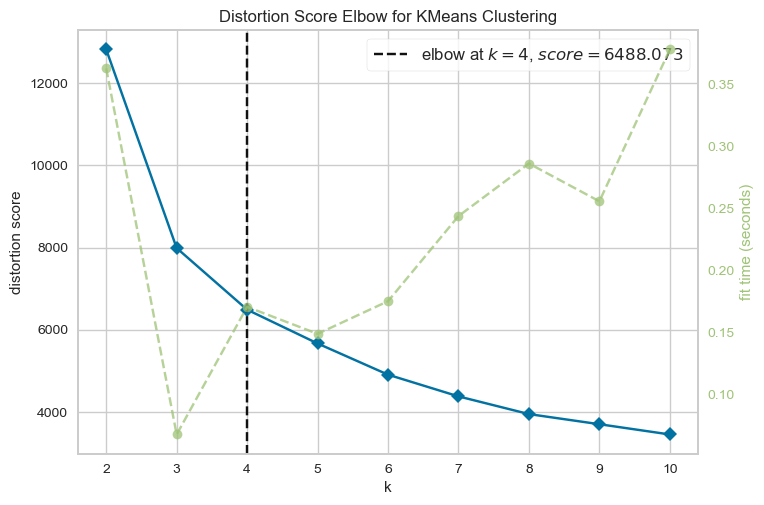

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
#Performing Elbow Method to Find Optimum Clusters
elbow_plot = KElbowVisualizer(KMeans())
elbow_plot.fit(PCA_ds)
elbow_plot.show()

In [92]:
from sklearn.metrics import silhouette_score
def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='coolwarm')
    plt.tight_layout()
    plt.show()

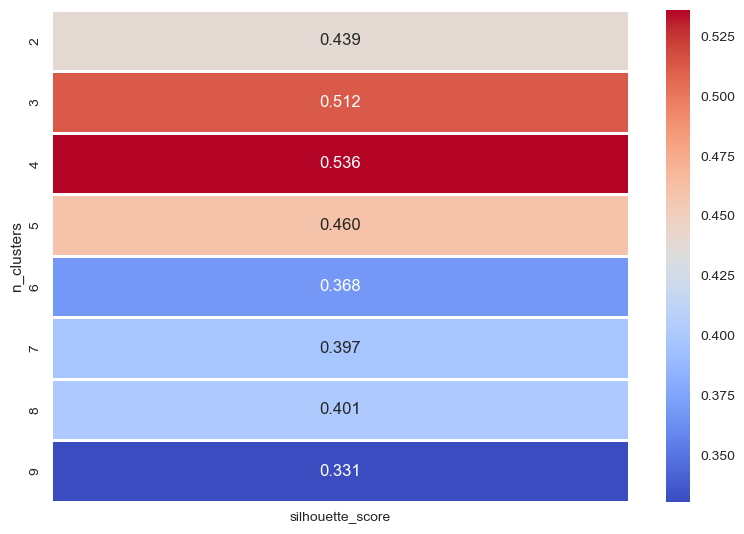

In [86]:
visualize_silhouette_layer(PCA_ds)

In [63]:
print("The number of clusters we consider is the one associated with the highest average silhouette score or the point where the score significantly drops after reaching its maximum value, in this case it is 4.")
print("We have received the same number of clusters from both methods. Now we wili perform clustering.")

The number of clusters we consider is the one associated with the highest average silhouette score or the point where the score significantly drops after reaching its maximum value, in this case it is 4.
We have received the same number of clusters from both methods. Now we wili perform clustering.


# Performing clustering

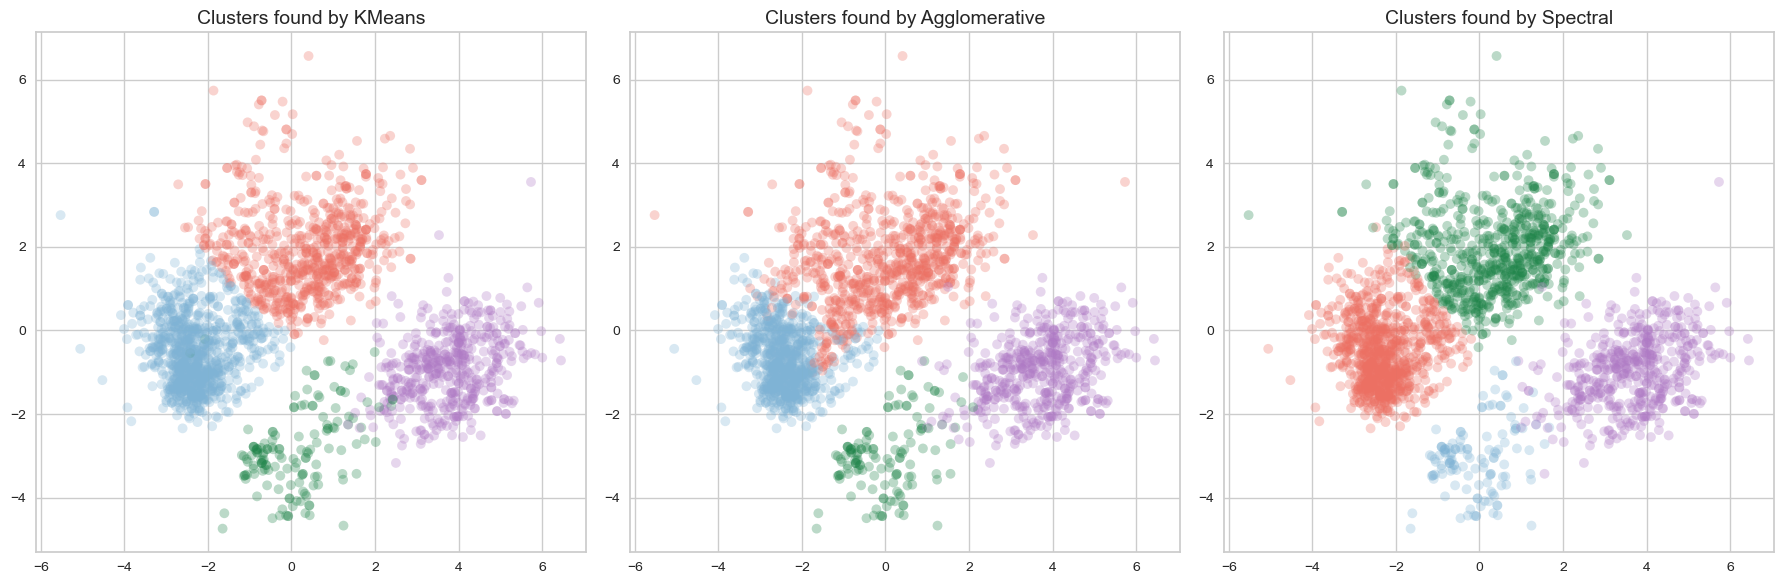

In [96]:
# Initialize KMeans, Agglomerative, and Spectral Clustering models
kmeans = cluster.KMeans(n_clusters=4)  # Adjust the number of clusters as needed
agglomerative = cluster.AgglomerativeClustering(n_clusters=4)
spectral = cluster.SpectralClustering(n_clusters=4)

# Fit the models and obtain cluster labels
kmeans_labels = kmeans.fit_predict(PCA_ds.iloc[:, :3])  # Considering all three columns for clustering
agglomerative_labels = agglomerative.fit_predict(PCA_ds.iloc[:, :3])
spectral_labels = spectral.fit_predict(PCA_ds.iloc[:, :3])

# Assign cluster labels to PCA_ds and data for KMeans
PCA_ds['Clusters_KMeans'] = kmeans_labels
data['Clusters_KMeans'] = kmeans_labels

# Assign cluster labels to PCA_ds and data for Agglomerative
PCA_ds['Clusters_Agglomerative'] = agglomerative_labels
data['Clusters_Agglomerative'] = agglomerative_labels

# Assign cluster labels to PCA_ds and data for Spectral
PCA_ds['Clusters_Spectral'] = spectral_labels
data['Clusters_Spectral'] = spectral_labels

# Define custom colors
custom_colors = ["#EC7063","#AF7AC5","#7FB3D5","#1E8449"]

# Plotting clusters side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting clusters for KMeans
colors_kmeans = [custom_colors[x] for x in kmeans_labels]
axes[0].scatter(PCA_ds.iloc[:, 0], PCA_ds.iloc[:, 1], c=colors_kmeans, alpha=0.3, s=50, linewidths=0)
axes[0].set_title('Clusters found by KMeans', fontsize=14)

# Plotting clusters for Agglomerative
colors_agglomerative = [custom_colors[x] for x in agglomerative_labels]
axes[1].scatter(PCA_ds.iloc[:, 0], PCA_ds.iloc[:, 1], c=colors_agglomerative, alpha=0.3, s=50, linewidths=0)
axes[1].set_title('Clusters found by Agglomerative', fontsize=14)

# Plotting clusters for Spectral
colors_spectral = [custom_colors[x] for x in spectral_labels]
axes[2].scatter(PCA_ds.iloc[:, 0], PCA_ds.iloc[:, 1], c=colors_spectral, alpha=0.3, s=50, linewidths=0)
axes[2].set_title('Clusters found by Spectral', fontsize=14)

plt.tight_layout()
plt.show()


In [66]:
data.head()

Year_Birth     Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957      Graduate         Single  58138.0        0         0   
1        1954      Graduate         Single  46344.0        1         1   
2        1965      Graduate       Together  71613.0        0         0   
3        1984      Graduate       Together  26646.0        1         0   
4        1981  Postgraduate        Married  58293.0        1         0   

   Recency  Wines  Fruits  Meat  ...  Is_Parent  Spent  Accepted_Campaigns  \
0       58    635      88   546  ...          0   1617                   0   
1       38     11       1     6  ...          1     27                   0   
2       26    426      49   127  ...          0    776                   0   
3       26     11       4    20  ...          1     53                   0   
4       94    173      43   118  ...          1    422                   0   

   Total_Purchases            Family_Status  Day_engaged        status  \
0               25                   Single         4136         Alone   
1                6     Family with Children         3586         Alone   
2               21  Family without Children         3785  Relationship   
3                8     Family with Children         3612  Relationship   
4               19     Family with Children         3634  Relationship   

   Clusters_KMeans  Clusters_Agglomerative  Clusters_Spectral  
0                0                       1                  0  
1                1                       2                  1  
2                0                       1                  0  
3                1                       2                  1  
4                2                       0                  3  

[5 rows x 38 columns]

# Exploration of clusters

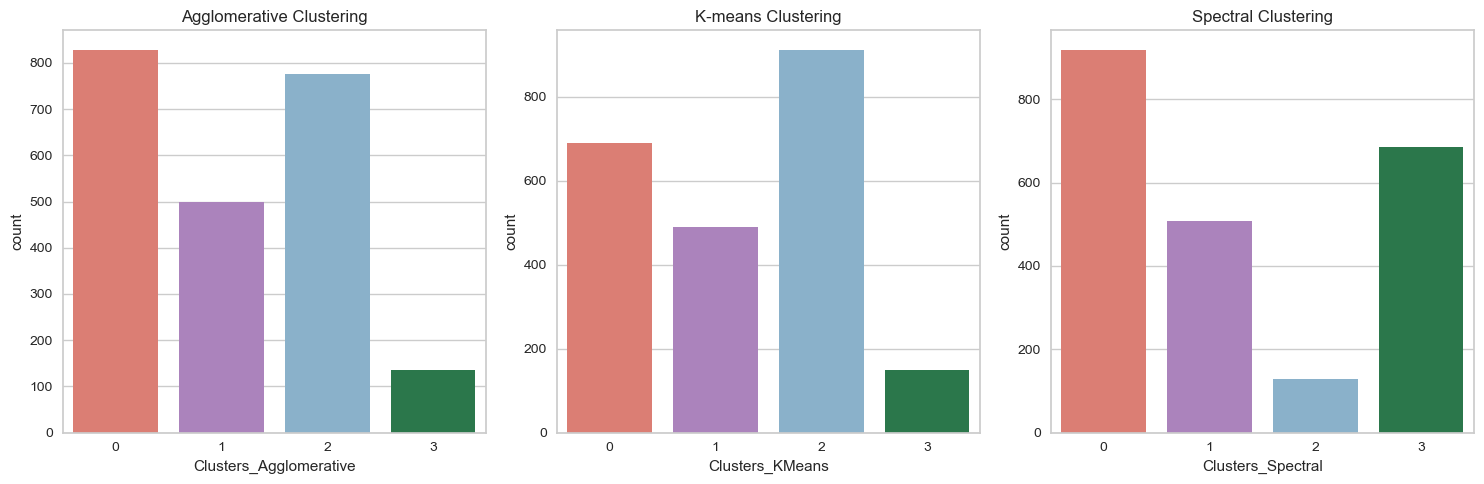

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
pal = ["#EC7063","#AF7AC5","#7FB3D5","#1E8449"]
# Countplot for Agglomerative Clustering
sns.countplot(x=PCA_ds["Clusters_Agglomerative"], palette=pal, ax=axes[0])
axes[0].set_title("Agglomerative Clustering")

# Countplot for K-means Clustering
sns.countplot(x=PCA_ds["Clusters_KMeans"], palette=pal, ax=axes[1])
axes[1].set_title("K-means Clustering")

# Countplot for Spectral Clustering
sns.countplot(x=PCA_ds["Clusters_Spectral"], palette=pal, ax=axes[2])
axes[2].set_title("Spectral Clustering")

plt.tight_layout()
plt.show()


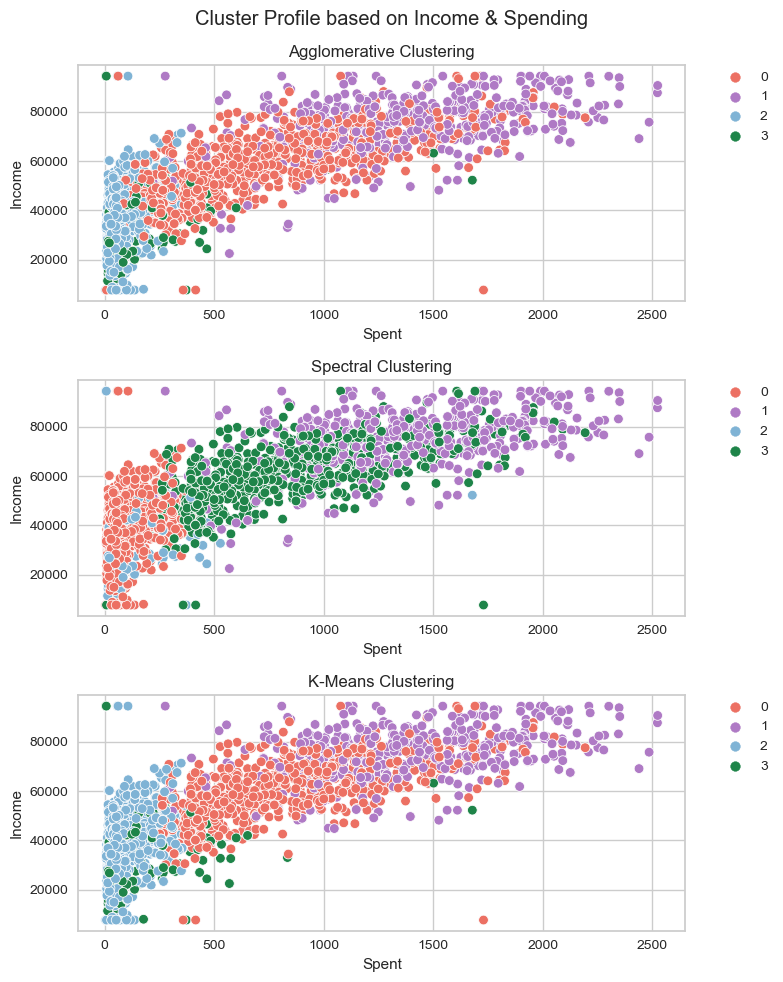

In [98]:
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(8, 10),constrained_layout=True)

colors = ["#EC7063","#AF7AC5","#7FB3D5","#1E8449"]

pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters_Agglomerative"], ax=ax[0], palette=sns.color_palette(colors))
pl2 = sns.scatterplot(data=data, x=data['Spent'], y=data["Income"],hue=data["Clusters_Spectral"],ax=ax[1],palette=sns.color_palette(colors))
pl3 = sns.scatterplot(data=data, x=data['Spent'], y=data["Income"],hue=data["Clusters_KMeans"],ax=ax[2],palette=sns.color_palette(colors))
fig.suptitle('Clusters Profile based on Spending')

ax[0].set_title("Agglomerative Clustering")
ax[1].set_title("Spectral Clustering")
ax[2].set_title("K-Means Clustering")

ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax[2].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


fig.suptitle("Cluster Profile based on Income & Spending")

fig.tight_layout()
fig.show()

In [69]:
print("As seen above, Spectral Clustering and K-means seems similar. We will be performing clustering via Spectral clustering. Spectral clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.Whenever K-means is appropriate for use then so too is spectral clustering.")

As seen above, Spectral Clustering and K-means seems similar. We will be performing clustering via Spectral clustering. Spectral clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.Whenever K-means is appropriate for use then so too is spectral clustering.


In [69]:
print("Income vs spending plot shows the clusters pattern based on Spectral Clustering\ngroup 0: high spending & average income\ngroup 1: low spending & low income\ngroup 2: high spending & high income       \ngroup 3: low spending & average income")

Income vs spending plot shows the clusters pattern based on Spectral Clustering
group 0: high spending & average income
group 1: low spending & low income
group 2: high spending & high income       
group 3: low spending & average income


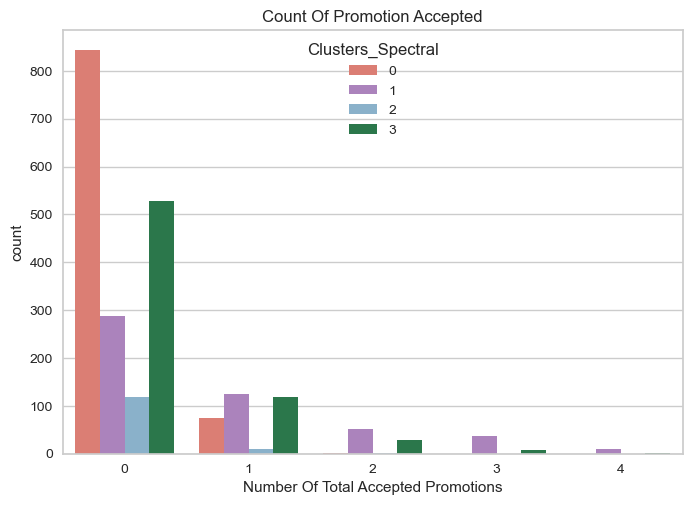

In [99]:
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Accepted_Campaigns"],hue=data["Clusters_Spectral"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

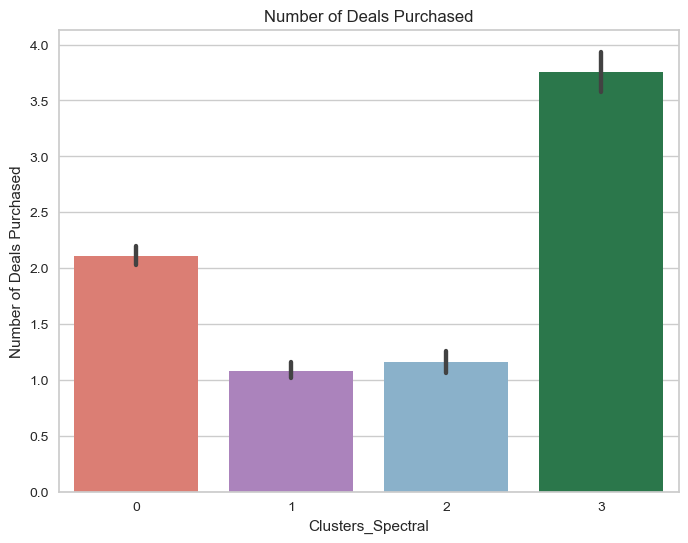

In [100]:
#Plotting the number of deals purchased
plt.figure(figsize=(8, 6))
sns.barplot(x="Clusters_Spectral", y="NumDealsPurchases", data=data, palette=pal)
plt.title("Number of Deals Purchased")
plt.xlabel("Clusters_Spectral")
plt.ylabel("Number of Deals Purchased")
plt.show()

In [72]:
print("We have performed clusters. Let us see who all are there in these clusters. Now, we will be profiling the clusters formed.  On the basis of the outcomes, We will be arriving at the conclusions.")

We have performed clusters. Let us see who all are there in these clusters. Now, we will be profiling the clusters formed.  On the basis of the outcomes, We will be arriving at the conclusions.


In [101]:
colors = ["#EC7063", "#AF7AC5", "#7FB3D5", "#1E8449"]
customer_groups = data["Clusters_Spectral"].unique().tolist()
customer_groups.sort()
fig = make_subplots(
    rows=1, cols=len(customer_groups),
    subplot_titles=customer_groups
)

for i, group in enumerate(customer_groups):
    plot_data = data[data.Clusters_Spectral == group]
    fig.add_trace(
        go.Scatter(
            x=plot_data["Spent"], 
            y=plot_data["Income"],
            mode='markers',
            name="Cluster {}".format(group),
            marker=dict(color=colors[i])  # Set color for each cluster
        ),
        row=1, col=i+1
    )

fig.update_layout(
    xaxis=dict(range=[0, 2000], title="Spent"),
    yaxis=dict(title="Income"),
    title={
        'text': "Income & Spending Distribution of Spectral Model Clusters",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)
fig.show()


In [74]:
print("Observations:\nCluster 1 and Cluster 2 are the groups who spent lower than 500.\nCluster 0 and Cluster 3 includes customers who spend higher than others.\nCustomers in Cluster 0 and 3 have higher income level relative to others.v")

Observations:
Cluster 1 and Cluster 2 are the groups who spent lower than 500.
Cluster 0 and Cluster 3 includes customers who spend higher than others.
Customers in Cluster 0 and 3 have higher income level relative to others.v


In [102]:
fig = make_subplots(rows=1, cols=3, start_cell="bottom-left",
                   subplot_titles=("Spending for different clusters","Purchase for different clusters",
                                  "Income for different clusters"))
clusters=data.Clusters_Spectral.unique().tolist()
clusters.sort()
colors_border = ["#EC7063","#AF7AC5","#7FB3D5","#1E8449"]
for i, cluster in enumerate(customer_groups):
    fig.add_trace(go.Box(x=data[data.Clusters_Spectral==cluster].Clusters_Spectral, y=data[data.Clusters_Spectral==cluster].Spent, name="Cluster {}".format(cluster),fillcolor=colors[i],line=dict(color=colors_border[i],width=1.5),boxmean=True),row=1,col=1)
    fig.add_trace(go.Box(x=data[data.Clusters_Spectral==cluster].Clusters_Spectral, y=data[data.Clusters_Spectral==cluster].Total_Purchases,fillcolor=colors[i],line=dict(color=colors_border[i],width=1.5),showlegend=False,boxmean=True),row=1,col=2)
    fig.add_trace(go.Box(x=data[data.Clusters_Spectral==cluster].Clusters_Spectral, y=data[data.Clusters_Spectral==cluster].Income,fillcolor=colors[i],line=dict(color=colors_border[i],width=1.5),showlegend=False,boxmean=True),row=1,col=3)
fig.show()
                         

Observations:

Cluster 0 : Customers with highest spending & high purchasing & mostly highest income
Cluster 1 : Customers with lowest spending & low purchasing & mostly average income
Cluster 2 : Customers with low spending & low purchasing & mostly low income
Cluster 3 : Customers with average spending & highest purchasing & mostly high income

Text(0.5, 1.0, 'Clustering based on Age')

<Figure size 800x800 with 0 Axes>

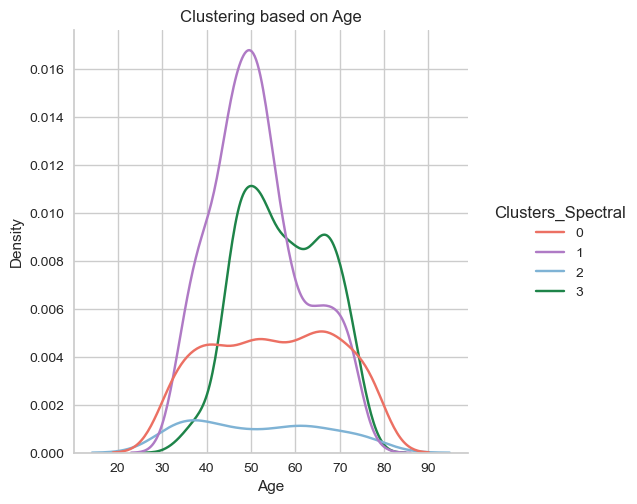

In [77]:
plt.figure(figsize=(8,8))
sns.displot(data=data,x='Age',hue='Clusters_Spectral',kind='kde',palette=pal)
plt.title("Clustering based on Age")

<Figure size 800x550 with 0 Axes>

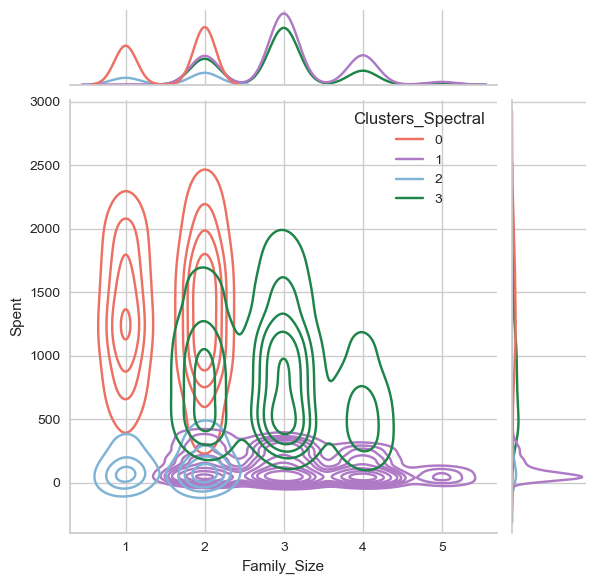

<Figure size 800x550 with 0 Axes>

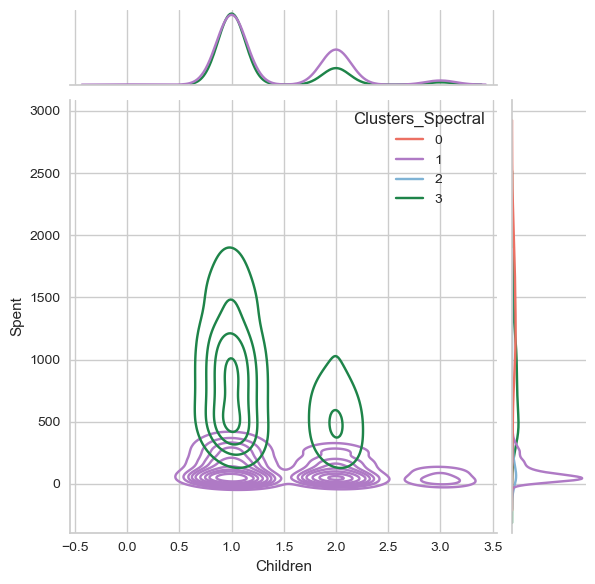

<Figure size 800x550 with 0 Axes>

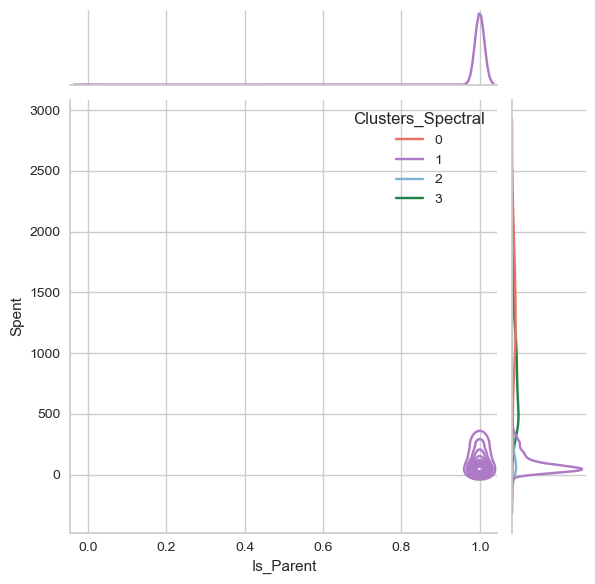

In [78]:
Personal = ["Family_Size","Children","Is_Parent"]
for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters_Spectral"], kind="kde", palette=pal)
    plt.show()

Text(0.5, 1.0, 'Clustering based on Education')

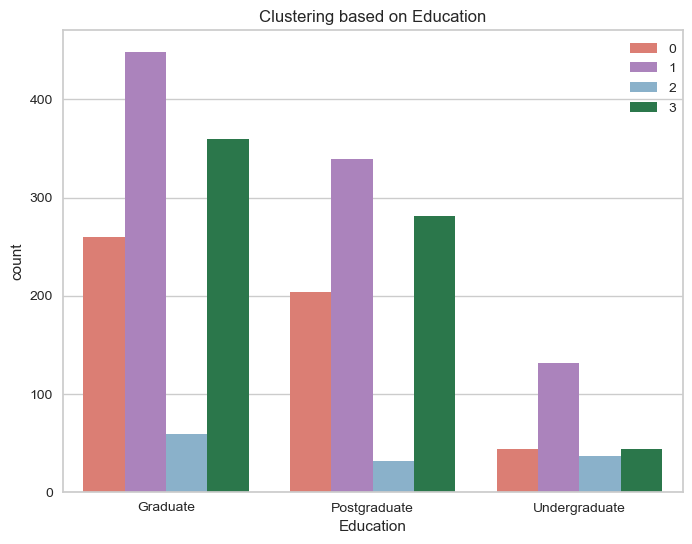

In [79]:
plt.figure(figsize=(8,6))
sns.countplot(data=data,x='Education',hue='Clusters_Spectral',palette=pal)
plt.legend(bbox_to_anchor=(1.01, 1),frameon=False)
plt.title("Clustering based on Education")

In [80]:
summary_df = data.groupby(["Clusters_Spectral"]).agg({"Education":"count","Age":np.mean,"Income":np.median,"Family_Size":np.mean, "Spent":np.median,"Is_Parent": np.mean,
                                                                        "NumDealsPurchases":np.mean,"NumWebPurchases":np.mean,"NumCatalogPurchases":np.mean,
                                                                        "NumStorePurchases":np.mean,"Day_engaged":np.median}).reset_index().rename(columns={"Education":"Customer count", "Is_Parent": "Is_Parent_Proportion"})


summary_df['Is_Parent'] = (summary_df['Is_Parent_Proportion'] >= 0.5).astype(int)

# Drop the 'Is_Parent_Proportion' column if not needed
summary_df = summary_df.drop(columns='Is_Parent_Proportion')
summary_df.round()

Clusters_Spectral  Customer count   Age   Income  Family_Size   Spent  \
0                 0             508  55.0  75810.0          2.0  1337.0   
1                 1             919  52.0  35860.0          3.0    63.0   
2                 2             128  52.0  26844.0          2.0    81.0   
3                 3             685  57.0  60631.0          3.0   761.0   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                1.0              5.0                  6.0                8.0   
1                2.0              2.0                  1.0                3.0   
2                1.0              2.0                  1.0                3.0   
3                4.0              6.0                  4.0                8.0   

   Day_engaged  Is_Parent  
0       3819.0          0  
1       3766.0          1  
2       3846.0          0  
3       3913.0          1

CLUSTER 0: 
HAS THE HIGHEST INCOME AND EXPENDITURE
ACCEPTS THE MOST PROMOTIONS
ARE NOT PARENTS 
MOST PURCHASES ARE MADE BY CATALOGUES AND WEB
MOSTLY CONSISTS OF GRADUATES AND POSTGRADUATES

CLUSTER 1: 
HAS THE LOWEST EXPENDITURE AND INCOME
DOESN’T ACCEPT PROMOTIONS
DOESN’T ACCEPT PROMOTIONS
CONSISTS MOSTLY OF PARENTS
HAS THE MAJORITY NUMBER OF CUSTOMERS
MOST CUSTOMERS BETWEEN AGES OF 40-60

CLUSTER 2: 
IS VERY WIDESPREAD AND AVERAGE. 
HAS THE LEAST NUMBER OF CUSTOMERS IN GENERAL
MOSTLY NOT PARENTS
DOESN’T ACCEPT PROMOTIONS

CLUSTER 3: 
AVERAGE EARNING BETWEEN 40k to 60k 
spending between 500 and 1500
PURCHASES THE MOST DEALS
SECOND HIGHEST EXPENDITURE
MOSTLY ARE PARENTS
HIGHEST PURCHASES ON WEB
MOSTLY CONSISTS OF GRADUATES AND POSTGRADUATES

In [105]:
categorical_cols = [ 'Family_Status', 'status']

# Perform one-hot encoding for categorical columns
df = pd.get_dummies(data, columns=categorical_cols)
# Create a label encoder instance
label_encoder = LabelEncoder()

# Encode ordinal variables
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df.head()

Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1957          0               2  58138.0        0         0       58   
1        1954          0               2  46344.0        1         1       38   
2        1965          0               3  71613.0        0         0       26   
3        1984          0               3  26646.0        1         0       26   
4        1981          1               1  58293.0        1         0       94   

   Wines  Fruits  Meat  ...  Total_Purchases  Day_engaged  Clusters_KMeans  \
0    635      88   546  ...             25.0         4136                1   
1     11       1     6  ...              6.0         3586                2   
2    426      49   127  ...             21.0         3785                1   
3     11       4    20  ...              8.0         3612                2   
4    173      43   118  ...             19.0         3634                0   

   Clusters_Agglomerative  Clusters_Spectral  \
0                       1                  1   
1                       2                  0   
2                       1                  1   
3                       2                  0   
4                       0                  3   

   Family_Status_Family with Children  Family_Status_Family without Children  \
0                                   0                                      0   
1                                   1                                      0   
2                                   0                                      1   
3                                   1                                      0   
4                                   1                                      0   

   Family_Status_Single  status_Alone  status_Relationship  
0                     1             1                    0  
1                     0             1                    0  
2                     0             0                    1  
3                     0             0                    1  
4                     0             0                    1  

[5 rows x 41 columns]

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets

X = df.drop(['Clusters_Spectral', 'Response'], axis=1)
y = df['Clusters_Spectral']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a model (Random Forest for example)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Validate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


# Display classification report
print(classification_report(y_test, predictions))


Accuracy: 0.9866071428571429
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       159
           1       0.98      1.00      0.99       113
           2       1.00      0.93      0.97        30
           3       0.98      0.99      0.99       146

    accuracy                           0.99       448
   macro avg       0.99      0.98      0.98       448
weighted avg       0.99      0.99      0.99       448



In [112]:
#Predicting Cluster
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report
# Split the data into training and testing sets
feature_columns = [
    'Education', 'Marital_Status', 'Income', 'Children',
    'Recency','Total_Purchases', 
    'Family_Status_Family with Children', 'Family_Status_Family without Children', 
    'Family_Status_Single', 'status_Alone', 'status_Relationship'
]
# Assuming 'Clusters_Spectral' is the cluster label column
X = df[feature_columns]
y = df['Clusters_Spectral']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train a model (Random Forest for example)
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Predict on the test set
predictions = model.predict(X_test)
# Validate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
# Display classification report
print(classification_report(y_test, predictions))

Accuracy: 0.9709821428571429
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       159
           1       0.98      0.99      0.99       113
           2       0.97      0.93      0.95        30
           3       0.97      0.97      0.97       146

    accuracy                           0.97       448
   macro avg       0.97      0.96      0.97       448
weighted avg       0.97      0.97      0.97       448



In [109]:
#Predicting Respose
# Selecting features and target variable
selected_features = ['Income', 'Recency', 'Wines', 'NumWebPurchases', 'NumCatalogPurchases',
                     'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Children', 'Family_Size', 'Spent']
target_variable = 'Response'

# Creating feature and target variables
X = df[selected_features]
y = df[target_variable]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
predictions = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print(classification_report(y_test, predictions))


Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       379
           1       0.60      0.36      0.45        69

    accuracy                           0.86       448
   macro avg       0.74      0.66      0.69       448
weighted avg       0.85      0.86      0.85       448



In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
feature_columns = [
    'Education', 'Marital_Status', 'Income', 'Children',
    'Recency','Total_Purchases', 
    'Family_Status_Family with Children', 'Family_Status_Family without Children', 
    'Family_Status_Single', 'status_Alone', 'status_Relationship'
]

# Assuming 'Clusters_Spectral' is the cluster label column
X = df[feature_columns]
y = df['Clusters_Spectral']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a model (Random Forest for example)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Validate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


# Display classification report
print(classification_report(y_test, predictions))


Accuracy: 0.96875
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       159
           1       0.97      0.99      0.98       113
           2       0.96      0.90      0.93        30
           3       0.97      0.97      0.97       146

    accuracy                           0.97       448
   macro avg       0.97      0.96      0.96       448
weighted avg       0.97      0.97      0.97       448

